# Parking Environment

In [2]:
import gymnasium as gym
from matplotlib import pyplot as plt
%matplotlib inline
import highway_env
highway_env.register_highway_envs()

/Users/kmcclenn/Documents/Class notes/6.8200/final_project/language-reward-design/.venv/lib/python3.12/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment exit-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/Users/kmcclenn/Documents/Class notes/6.8200/final_project/language-reward-design/.venv/lib/python3.12/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment highway-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/Users/kmcclenn/Documents/Class notes/6.8200/final_project/language-reward-design/.venv/lib/python3.12/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment highway-fast-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/Users/kmcclenn/Documents/Class notes/6.8200/final_project/language-reward-design/.venv/l

In [78]:
env = gym.make('parking-v0', render_mode='rgb_array')


In [86]:
# uncomment for grayscale observation

# env.config['observation'] = {
#     "type": "GrayscaleObservation",
#     "observation_shape": (128, 64),
#     "stack_size": 1,
#     "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
#     "scaling": 1.75,
# }

# set render mode to just array of the image values (600x300x3)
env.metadata['render_modes'] = ['rgb_array']


In [87]:
## returns a tuple of (observation, info)
## observation is a dict of "observation", "achieved_goal", and "desired_goal", each with the 6D state space
obs, info = env.reset()

### Get and print RGB state image

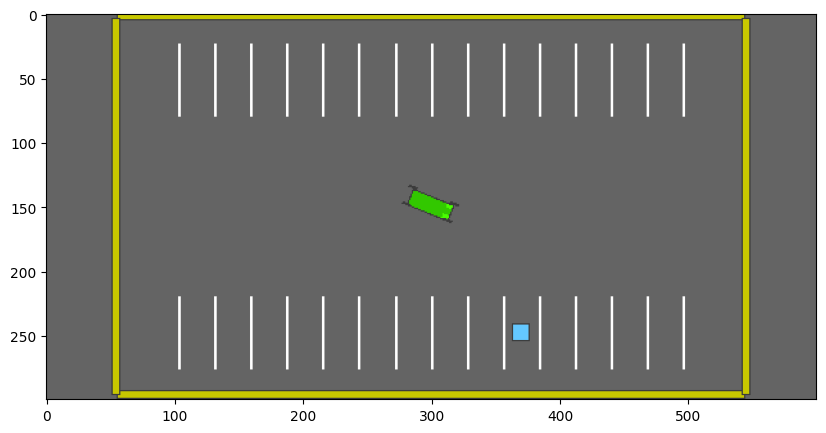

: 

In [88]:
render = env.render()
fig, ax = plt.subplots(ncols=1, figsize=(12, 5))
ax.imshow(render) # , cmap=plt.get_cmap('gray')
plt.show()

### Get 6D state/observation

In [81]:
## takes in a action tuple (throttle, heading)
obs, reward, terminated, truncated, info = env.step((5.0, 2.0))

# Reward Function Design

We will use a base algorithm of PPO to analyze the different reward functions

### Sparse Reward

$R(s) = 1(s = s_g)$

### Distance Reward

$R(s) = -||s-s_g||_{W,p}^{p} - b (collission)$

### VLM Reward
$R(s) = VLM\_reward(s)$ where VLM_reward is given by the trained network that outputs a reward function of the input state $s \rightarrow f(s) = VLM\_reward(s)$. This reward can be
* Piecewise, as the VLM generates subgoals and thus subtargets for the robot to use to train
    * eg. first, position the car such that it is facing the desired orientation and then back it in the parking spot
    * More concretely, this idea looks like: $VLM(s, s_{render}) \rightarrow \{\text{text subgoals using the parameters of } s\} \rightarrow f_{render}(s)$, a piecewise numerical function that gives high reward to the appropriate subgoals. The last step can use a distance metric or other similar reward mechanism.
    * We may have to add another element in the state as a subgoals completed marker so the agent doesn't travel backwards.
* Covering the entire environment, so the VLM outputs one reward function given the state parameters it is allowed to use

These two ideas really just differ in the number of subgoals generated (0 versus > 0)